### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [81]:
df = pd.read_csv('../02_Daten/Kaffeemaschine/sp_xdk.csv', sep=';')

In [82]:
# Richtige Zeit für alle Einträge
df['time'] = [datetime.utcfromtimestamp(x/1000) for x in df['time']]

In [83]:
df['day_number'] = df['time'].dt.day_of_week

In [84]:
df['day_name'] = df['day_number']

In [86]:
df['day_name'].replace(0, "Montag", inplace=True)
df['day_name'].replace(1, "Dienstag", inplace=True)
df['day_name'].replace(2, "Mittwoch", inplace=True)
df['day_name'].replace(3, "Donnerstag", inplace=True)
df['day_name'].replace(4, "Freitag", inplace=True)
df['day_name'].replace(5, "Samstag", inplace=True)
df['day_name'].replace(6, "Sonntag", inplace=True)

In [95]:
df.time.dt.day

0          28
1          28
2          28
3          28
4          28
           ..
5610774     9
5610775     9
5610776     9
5610777     9
5610778     9
Name: time, Length: 5610779, dtype: int64

In [87]:
df.head()

,time,buttonpressed,x,y,z,day_number,day_name
0,2022-01-28 10:11:50.881,False,0.159,4.074,0.277,4,Freitag
1,2022-01-28 10:11:51.039,False,0.128,4.097,0.262,4,Freitag
2,2022-01-28 10:11:51.241,False,0.171,4.099,0.260,4,Freitag
3,2022-01-28 10:11:51.369,False,0.158,4.106,0.262,4,Freitag
4,2022-01-28 10:11:51.511,False,0.166,4.123,0.239,4,Freitag


In [59]:
# insgesamt 5.610.779 Einträge
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610777 entries, 0 to 5610776
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   time     datetime64[ns]
 1   x        float64       
 2   y        float64       
 3   z        float64       
 4   weekday  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 214.0+ MB


In [6]:
# keine fehlenden Werte
df.isnull().sum()

time             0
buttonpressed    0
x                0
y                0
z                0
dtype: int64

In [7]:
# einfache statistische Werte anzeigen lassen. Ausreißer bei y?
print(df.describe())

# ein Eintrag mit ungewöhnlich hohem y
print(df[df['y']>100])

# ein Eintrag mit ungewöhnlich niedrigem y
print(df[df['y']<-100])

                  x             y             z
count  5.610779e+06  5.610779e+06  5.610779e+06
mean   2.558145e-01  5.109091e-02  4.266428e+00
std    4.874310e-02  1.001756e+01  1.345958e-01
min   -4.632000e+00 -1.677717e+04 -3.996000e+00
25%    2.230000e-01  3.400000e-02  4.260000e+00
50%    2.490000e-01  4.900000e-02  4.270000e+00
75%    2.910000e-01  6.200000e-02  4.281000e+00
max    3.341000e+00  1.677721e+04  8.191000e+00
                           time  buttonpressed      x             y      z
4646434 2022-02-07 12:01:10.466          False  0.354  16777.208984  4.259
                           time  buttonpressed      x             y      z
2670898 2022-02-03 00:05:03.619          False  0.214 -16777.171875  4.284


In [4]:
# diese zwei Einträge entfernen
df.drop(df[df.y < -100].index, inplace=True)
df.drop(df[df.y > 100].index, inplace=True)
df.reset_index(inplace=True)

In [5]:
df.drop(['index'], axis=1, inplace=True)

In [6]:
# Button pressed ist immer False -> kann gelöscht werden
print(df.buttonpressed.value_counts())
df.drop(['buttonpressed'], axis=1, inplace=True)

False    5610777
Name: buttonpressed, dtype: int64


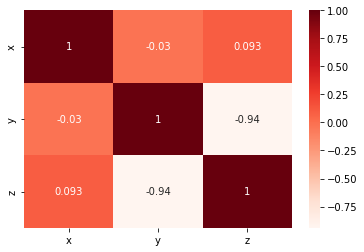

In [11]:
# starke negative Korrelation zwischen y und z. Ansonsten nur schwache Korrelation
# unnötig...
sns.heatmap(df[['x','y','z']].corr(), annot=True, cmap = 'Reds')
plt.show()

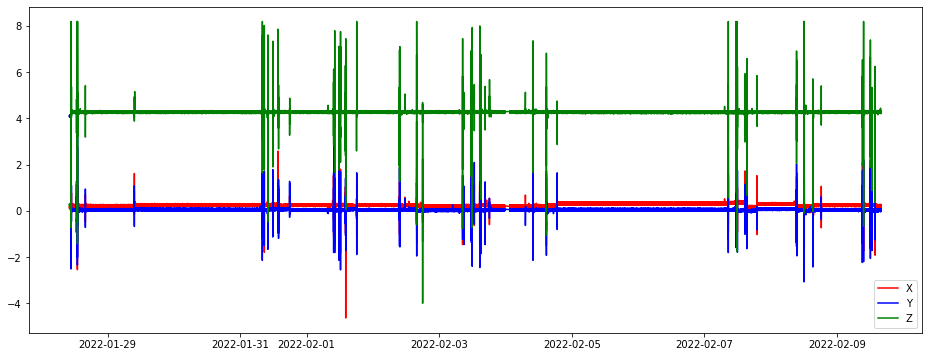

In [12]:
# Ausschläge sind immer an gleicher Stelle -> Fokusierung auf eine Variable ausreichend
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time, df.x, color='red', label='X')
ax.plot(df.time, df.y, color='blue', label='Y')
ax.plot(df.time, df.z, color='green', label='Z')

plt.legend(loc=4)

In [13]:
# raus finden, wo Bewegungen stattfinden -> Werte steigen oder sinken
df[df.x > 0.6]

,time,x,y,z
5790,2022-01-28 10:39:19.962,2.110,1.207,-0.717
6248,2022-01-28 10:41:04.368,0.967,-0.174,4.102
6249,2022-01-28 10:41:04.593,1.445,0.583,5.641
6256,2022-01-28 10:41:06.025,1.090,-0.936,4.667
6265,2022-01-28 10:41:07.885,0.631,-0.100,3.349
...,...,...,...,...
5571308,2022-02-09 13:45:38.281,0.829,-0.097,4.553
5571309,2022-02-09 13:45:38.446,0.702,-0.264,4.510
5571313,2022-02-09 13:45:39.316,0.646,-0.092,4.048
5571314,2022-02-09 13:45:39.503,0.913,0.284,4.783


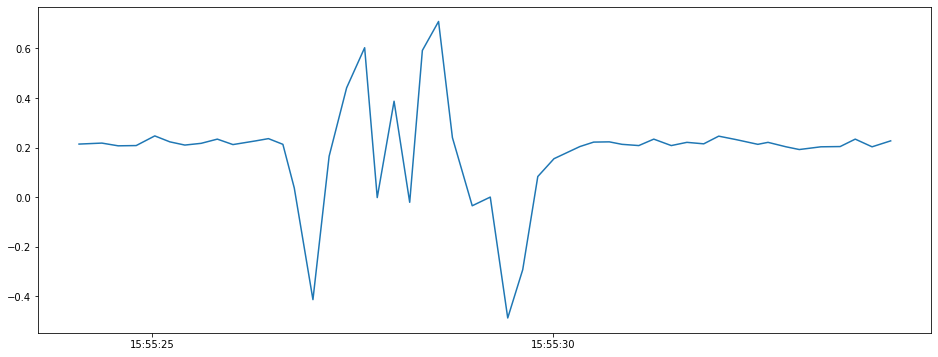

In [14]:
# starkes reinzoomen auf eine Bewegungssequenz -> sehr geringe Bewegungen
sample = df[108200:108250]

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(sample.time, sample.x)

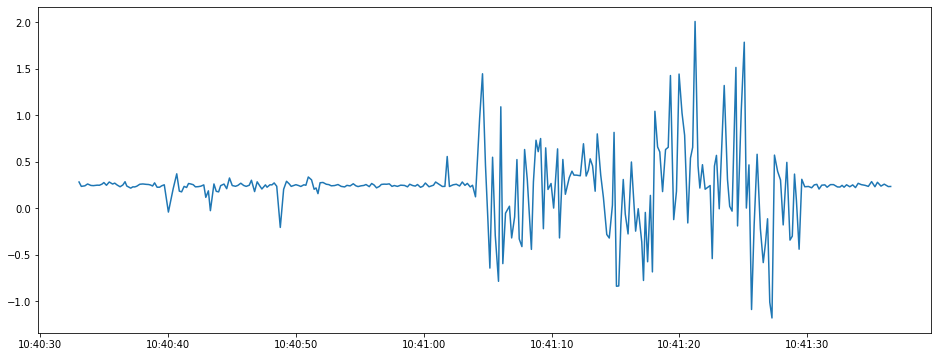

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[6100:6400], df.x[6100:6400])

C:\Users\pauls\AppData\Local\Temp/ipykernel_13880/4129546108.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


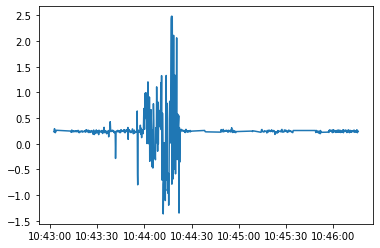

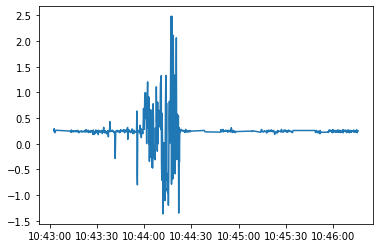

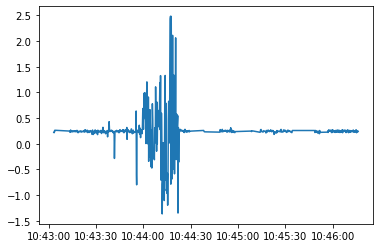

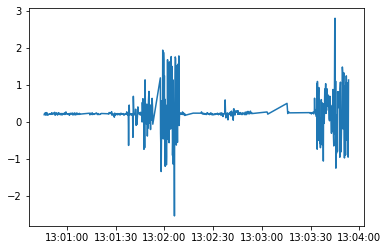

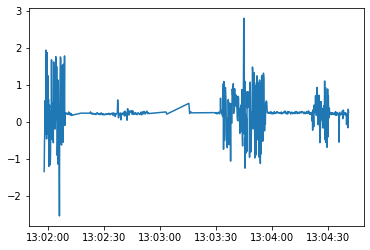

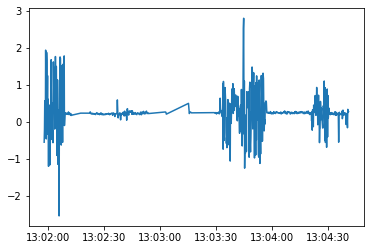

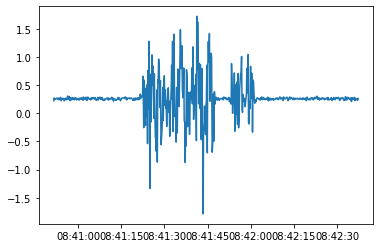

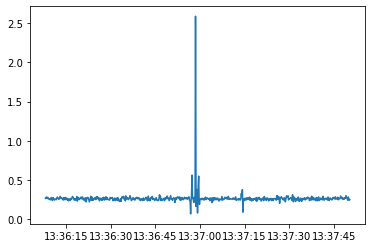

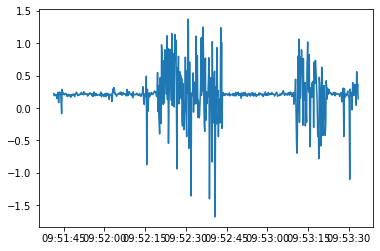

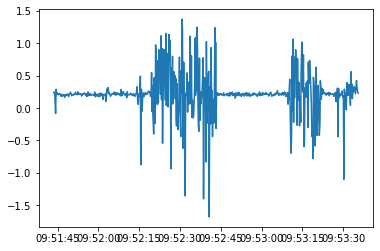

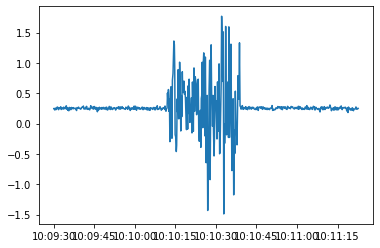

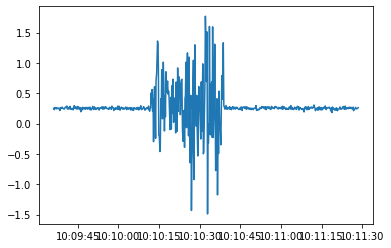

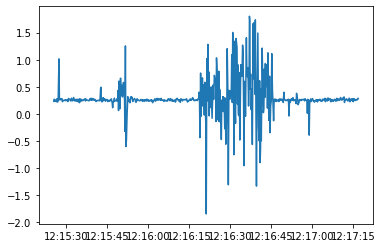

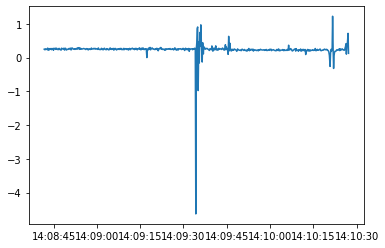

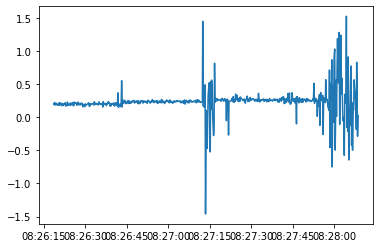

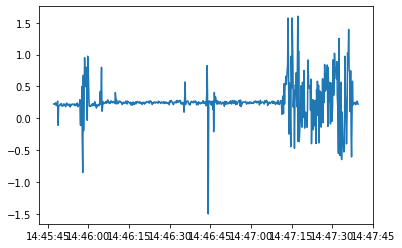

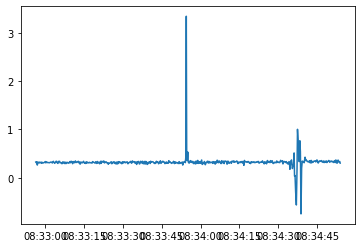

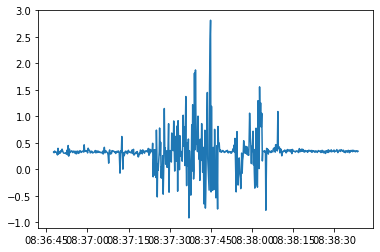

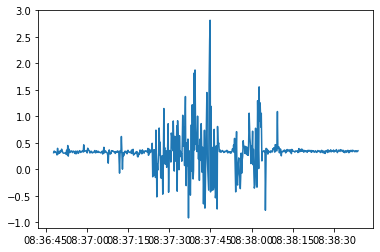

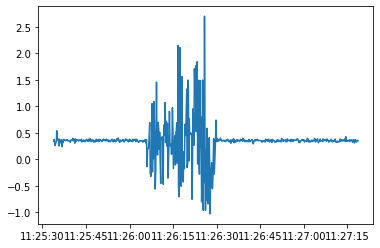

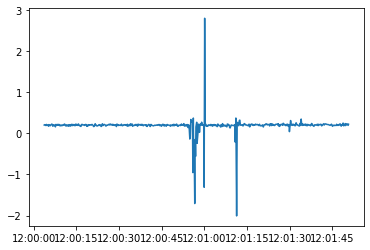

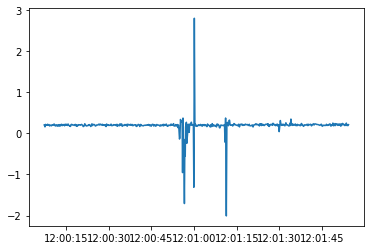

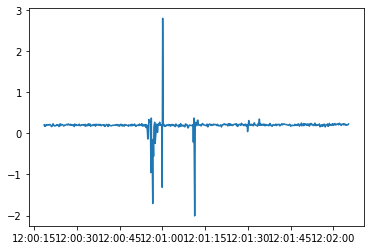

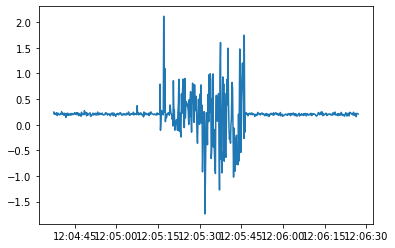

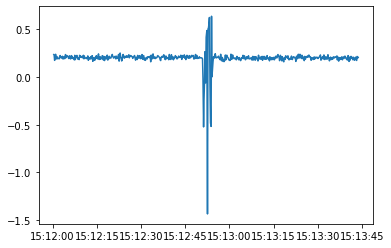

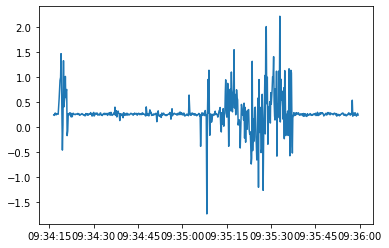

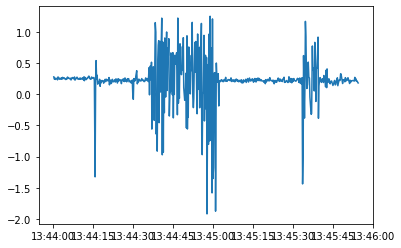

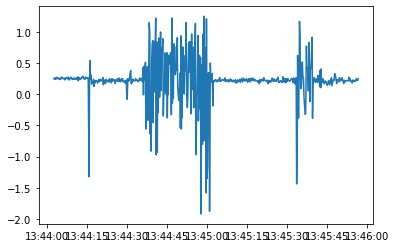

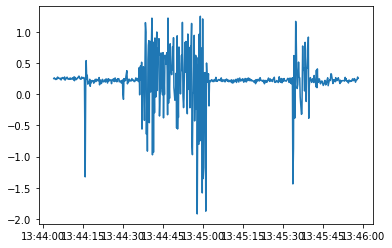

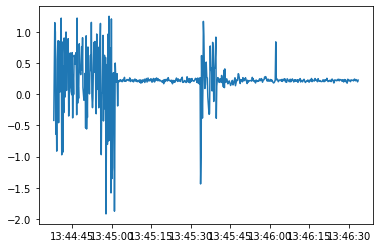

In [21]:
''' Wenn X einen bestimmten Wert über- oder unterschreitet wird für diese Stelle eine Grafik erstellt
    Problem: mehrere Grafiken von der gleichen Stelle, wenn folgende Werte auch über / unter Threshold. Für einen 
Zustand soll ja nur eine Grafik erstellt werden und nicht mehrere direkt hintereinander
    mögliche Lösung: Liste mit jeweiligen Indexen speichern und nur Grafik anzeigen, wenn in direkter Umgebung 
nicht schon eine Grafik erstellt wurde '''

for ind, (time, val) in enumerate(zip(df.time, df.x)):
    if (val > 2.3 or val < -1.4):
        #print(i,time,val)
        plt.figure()
        plt.plot(df.time[ind - 300: ind + 300], df.x[ind - 300: ind + 300])

In [7]:
df.describe()

,x,y,z
count,5.610777e+06,5.610777e+06,5.610777e+06
mean,2.558145e-01,5.109092e-02,4.266428e+00
std,4.874309e-02,1.344624e-01,1.345958e-01
min,-4.632000e+00,-3.072000e+00,-3.996000e+00
25%,2.230000e-01,3.400000e-02,4.260000e+00
50%,2.490000e-01,4.900000e-02,4.270000e+00
75%,2.910000e-01,6.200000e-02,4.281000e+00
max,3.341000e+00,6.047000e+00,8.191000e+00


In [43]:
df.quantile(1 - 100 / 5610779)

x    1.496
y    4.137
z    7.015
Name: 0.9999821771629216, dtype: float64

In [44]:
df.quantile(100 / 5610779)

x   -0.956
y   -1.496
z    0.215
Name: 1.7822837078416385e-05, dtype: float64

In [45]:
# erst mal alle Indices, wo X-Wert über Threshold zu Liste hinzufügen
# Index bzw. Zahl muss aus Liste entfernt werden, wenn vorheriger Wert in einer bestimmten Spanne liegt (bspw. 200)
ind_x = []
ind_y = []
ind_z = []

for ind, (time, x, y, z) in enumerate(zip(df.time, df.x, df.y, df.z)):
    if (x > 1.4 or x < -1):
        ind_x.append(ind)
    if (y > 4.2 or y < -2.1):
        ind_y.append(ind)
    if (z > 8.2 or z < -0.2):
        ind_z.append(ind)        

In [46]:
print(len(ind_x), len(ind_y), len(ind_z))

218 22 19


In [54]:
th = 500
a = np.array(ind_x)
X = np.delete(a, np.argwhere(np.ediff1d(a) <= th) + 1)

In [55]:
len(X)

45

In [33]:
b = np.array(ind_y)
Y = np.delete(b, np.argwhere(np.ediff1d(b) <= th) + 1)

In [34]:
c = np.array(ind_z)
Z = np.delete(c, np.argwhere(np.ediff1d(c) <= th) + 1)

C:\Users\pauls\AppData\Local\Temp/ipykernel_7400/2490237928.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,6))


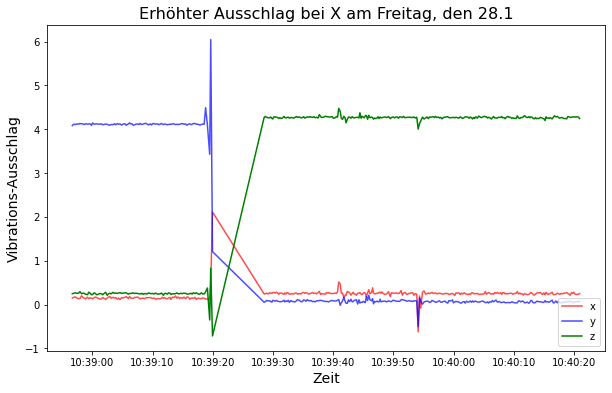

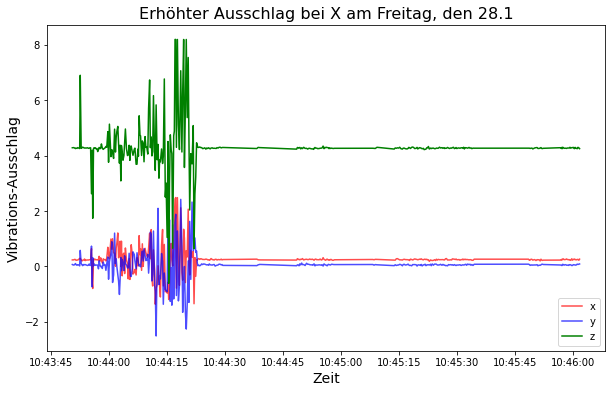

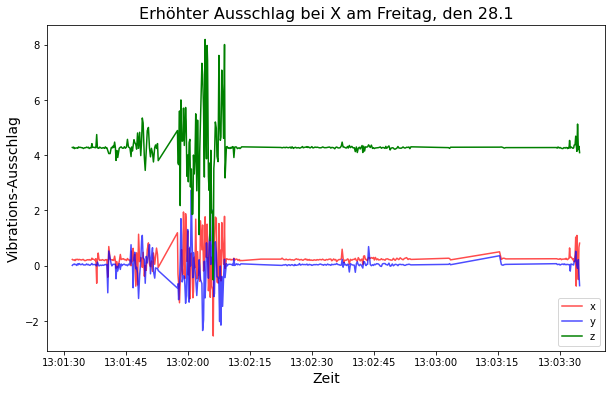

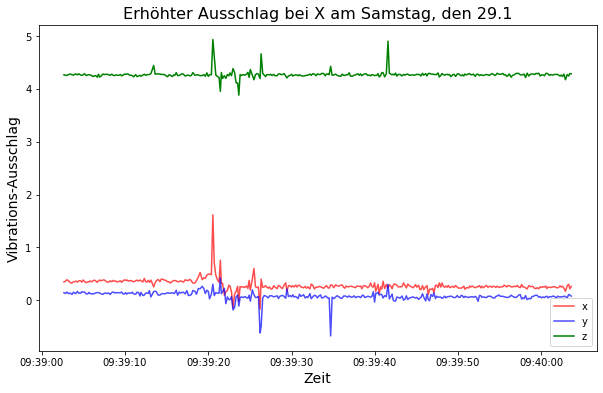

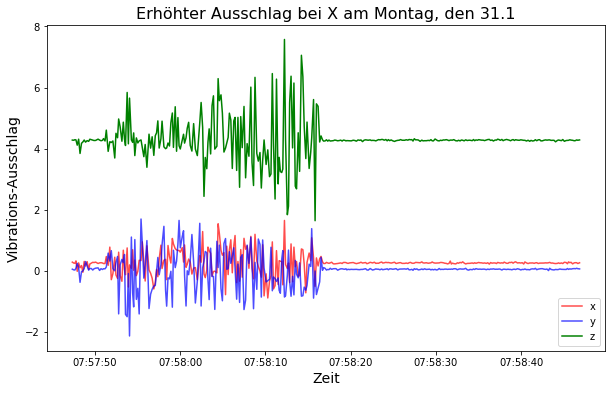

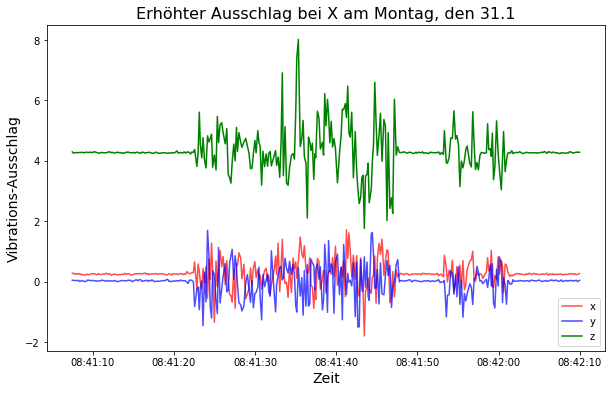

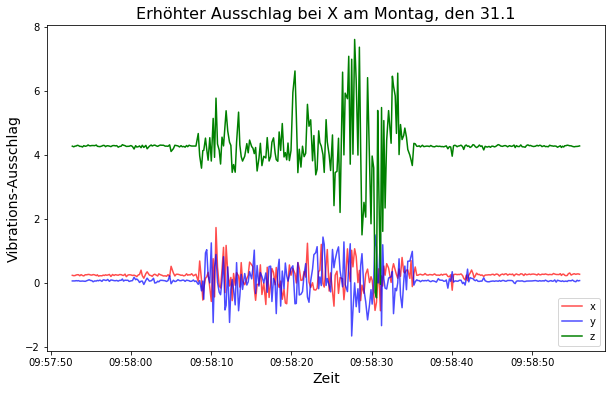

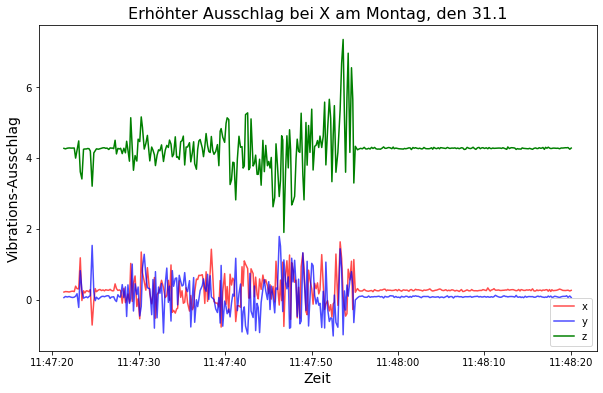

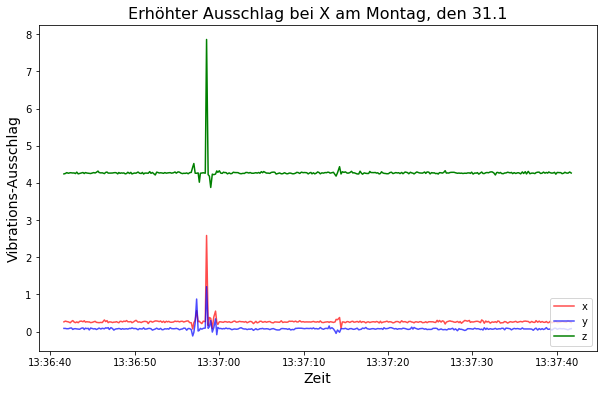

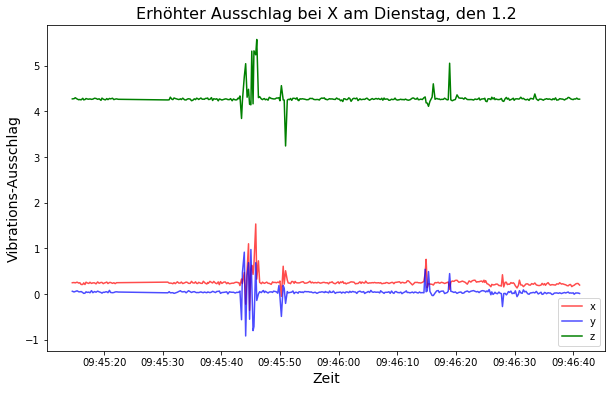

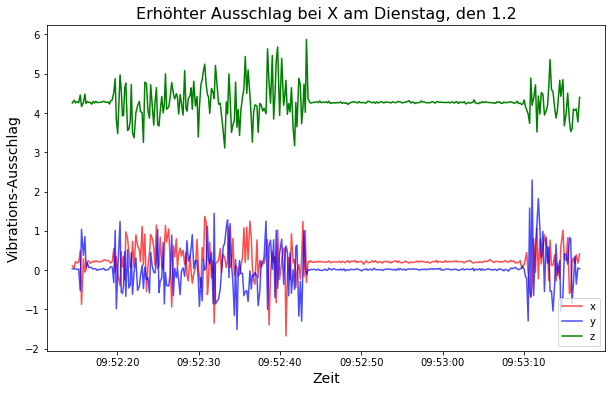

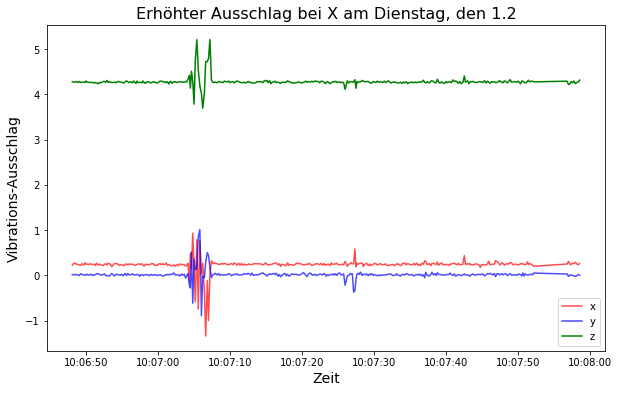

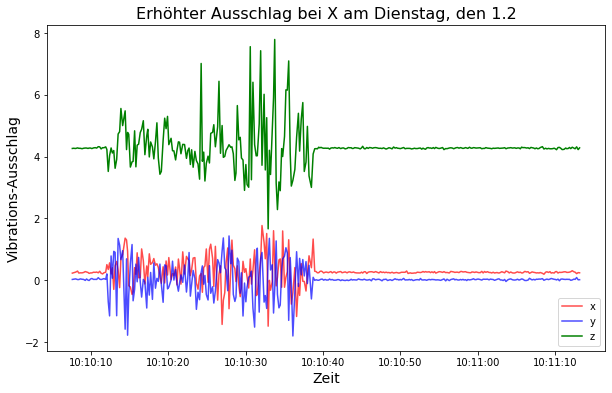

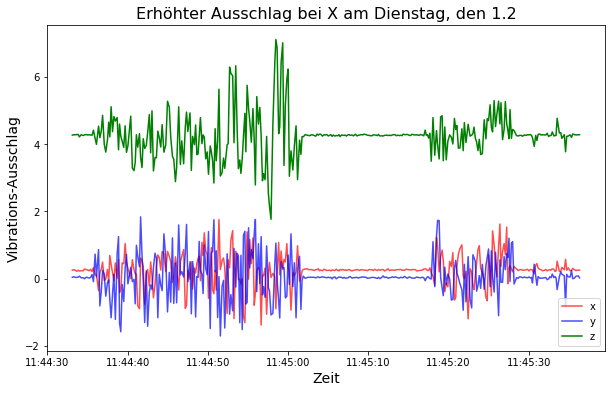

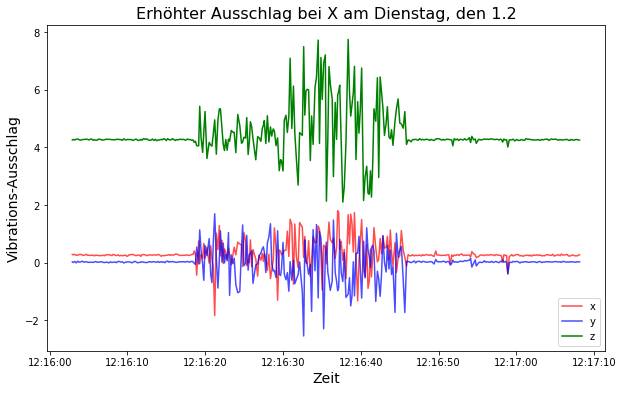

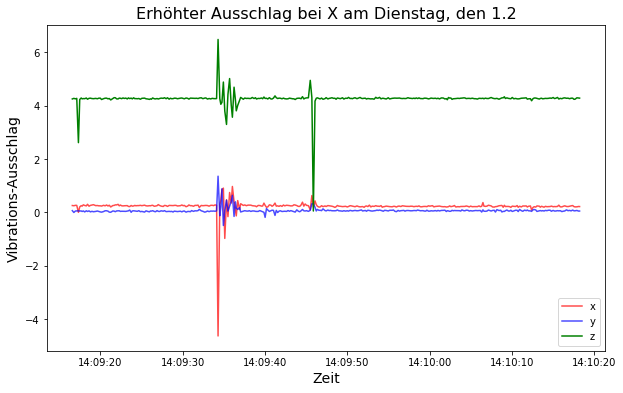

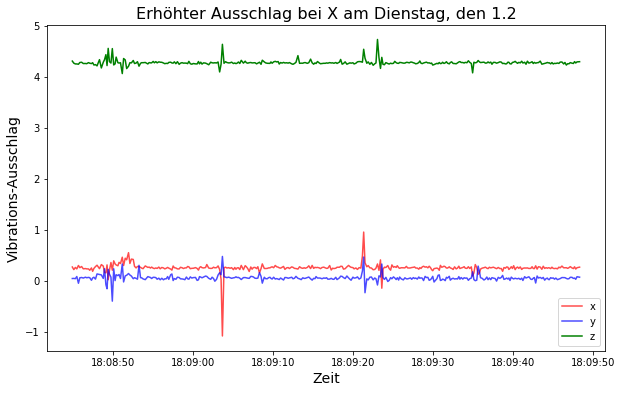

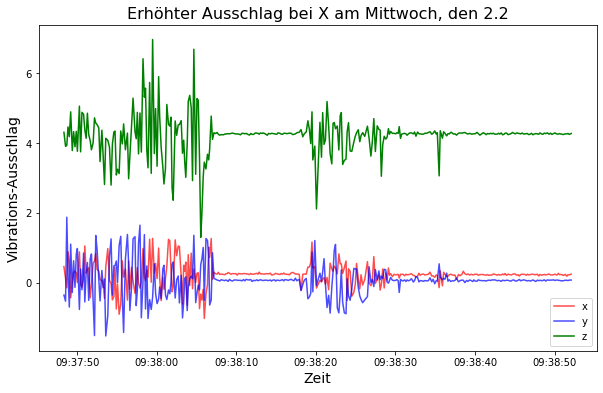

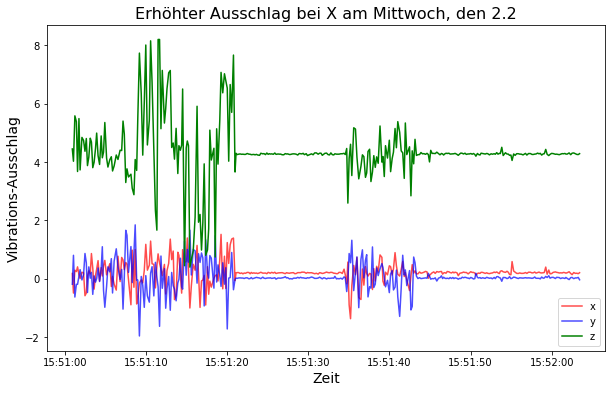

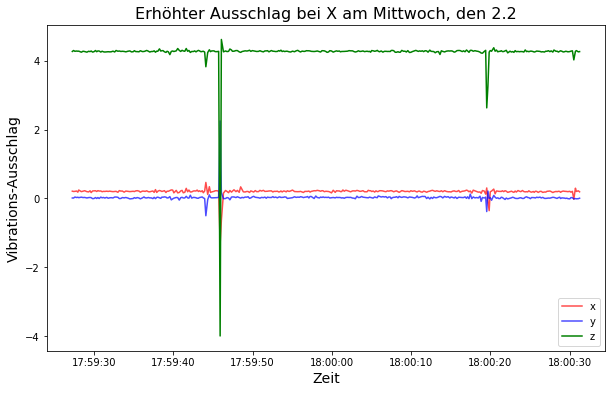

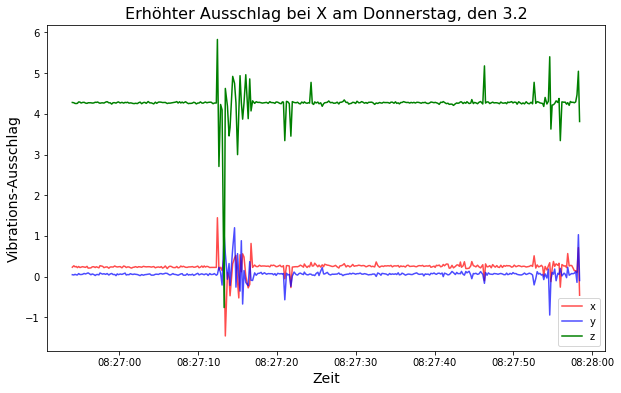

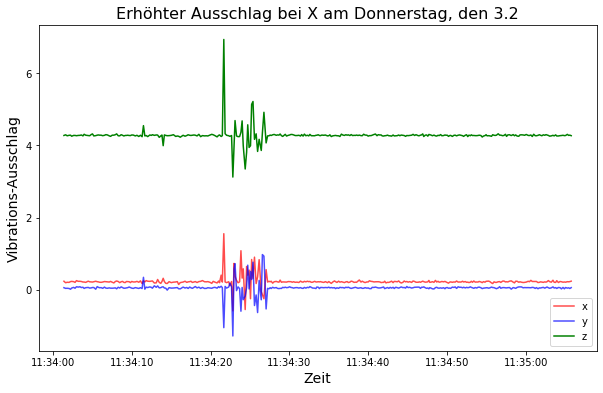

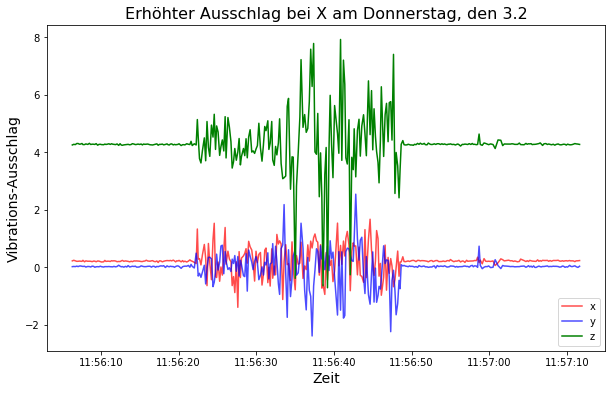

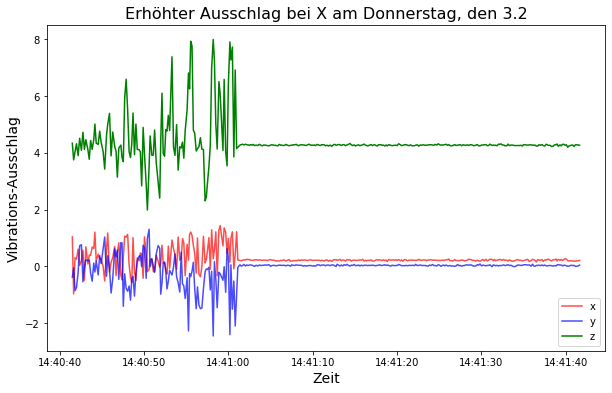

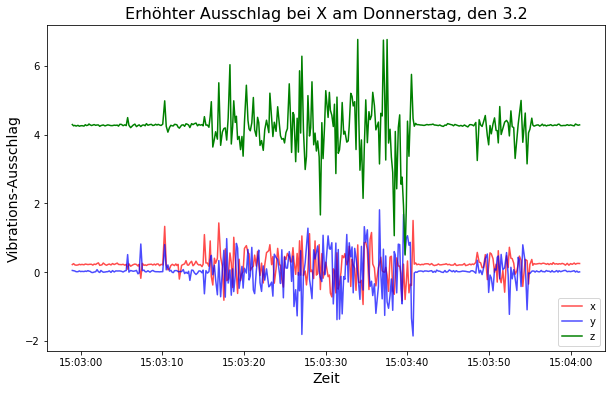

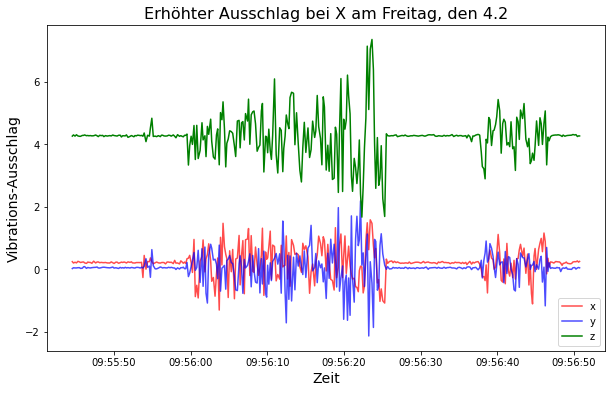

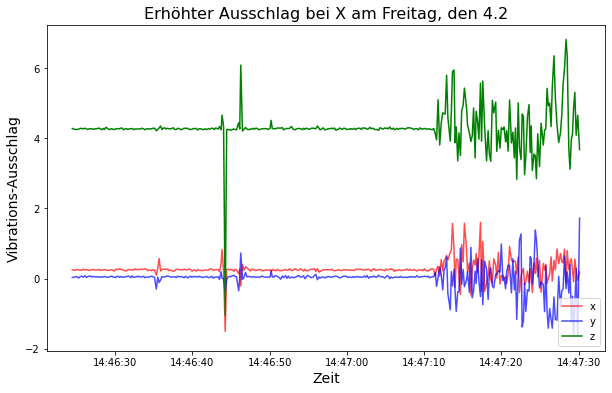

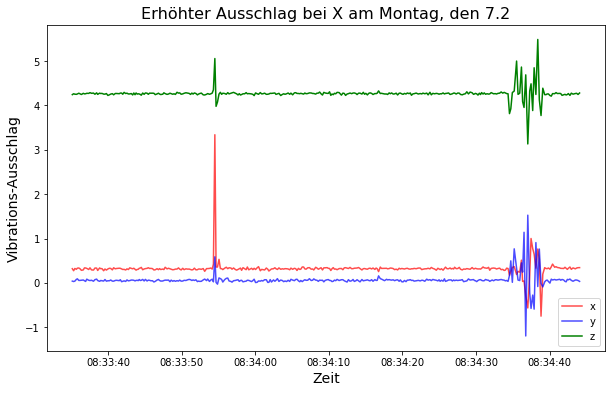

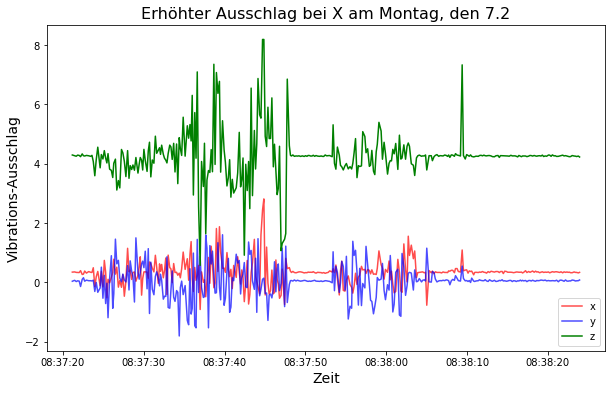

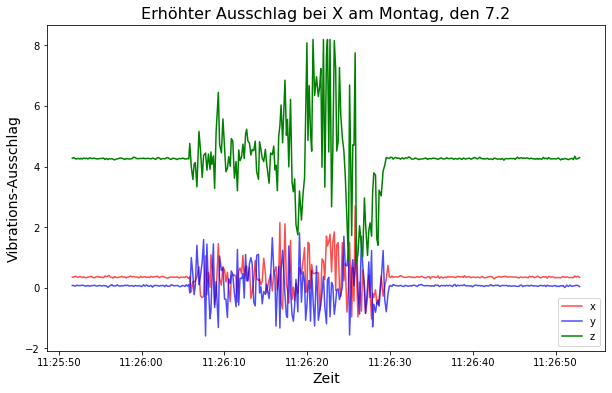

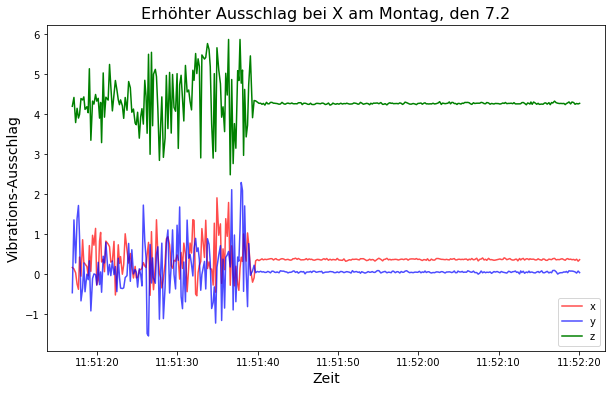

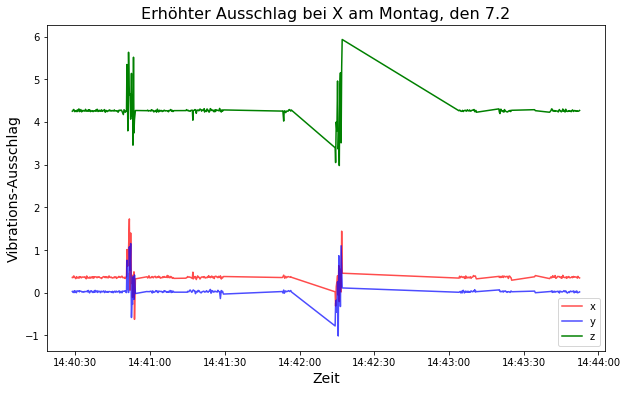

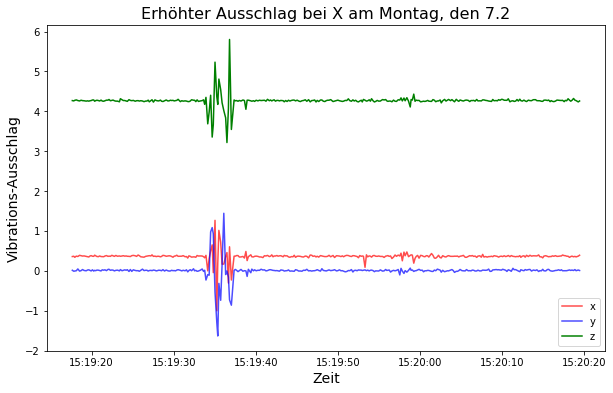

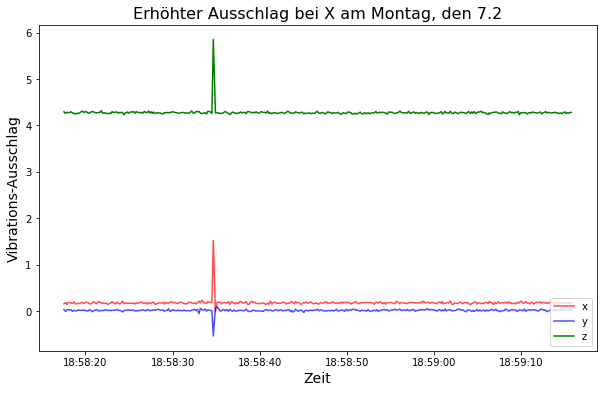

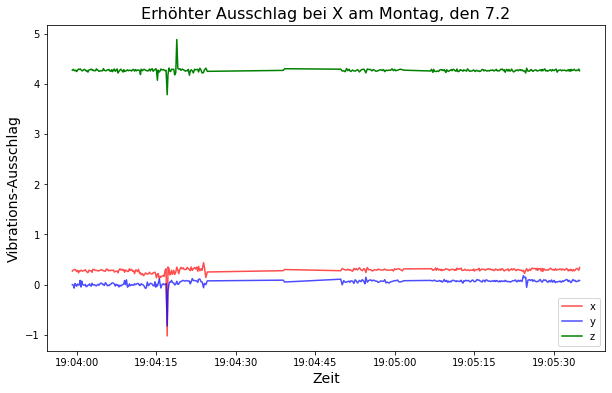

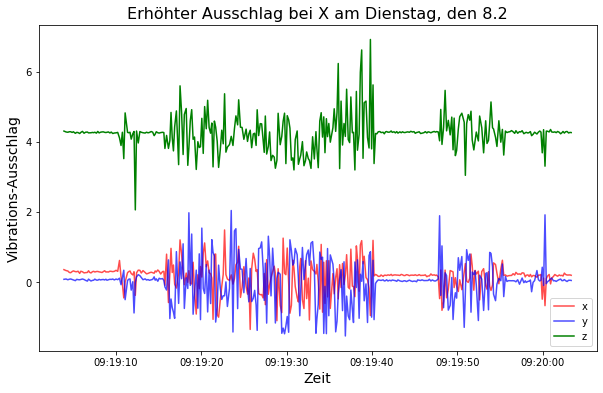

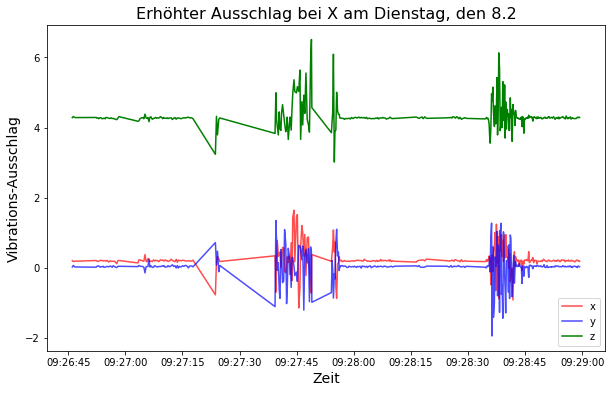

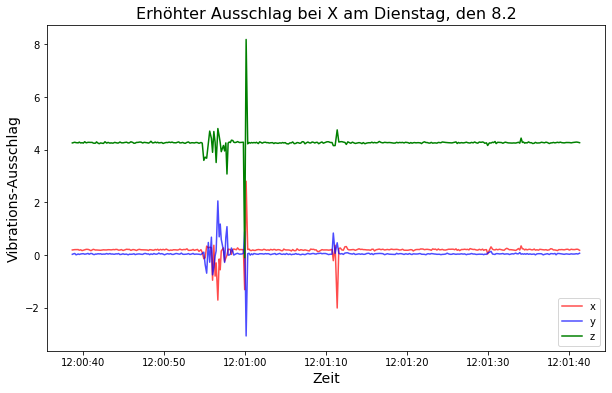

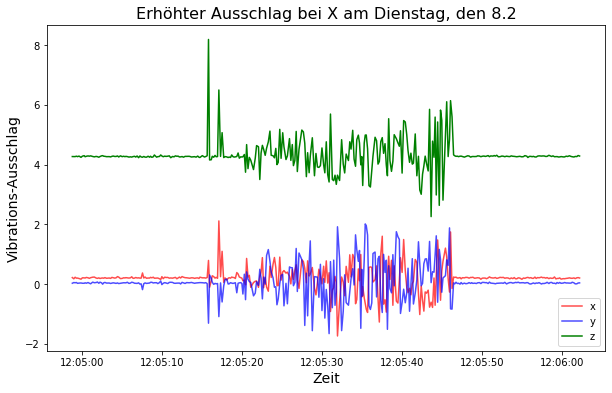

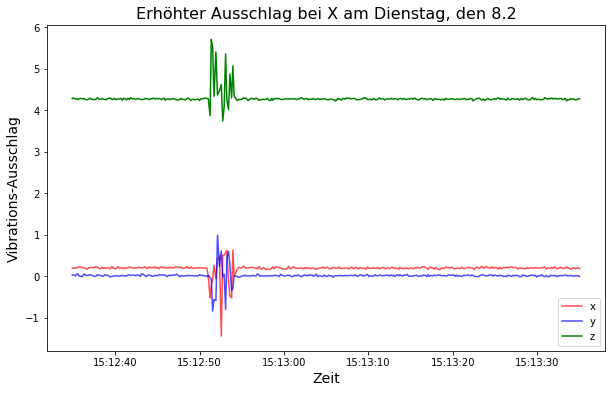

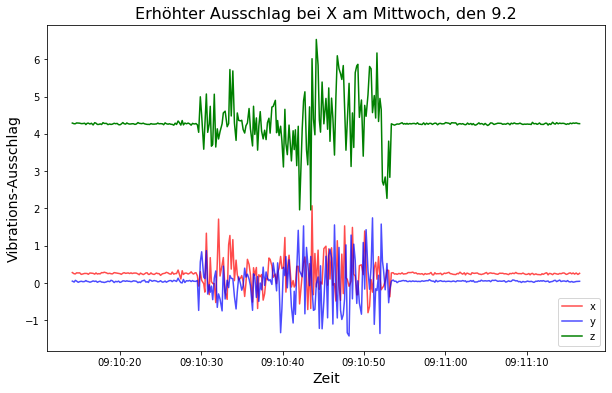

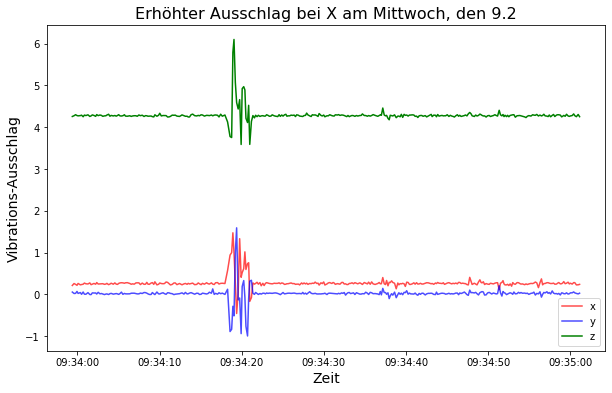

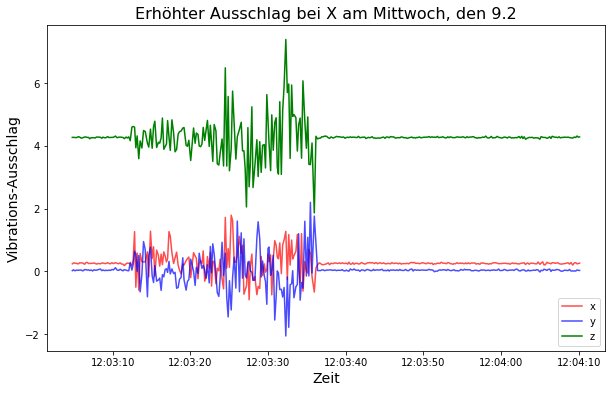

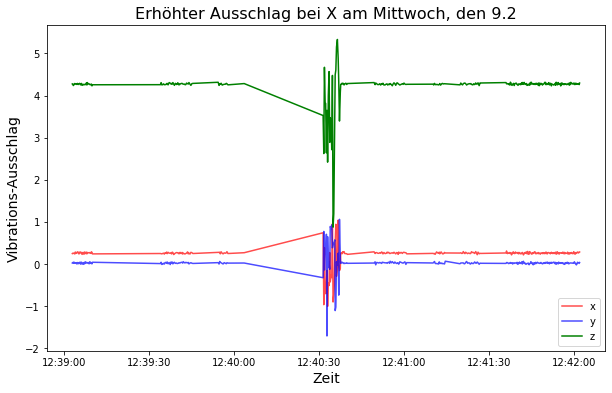

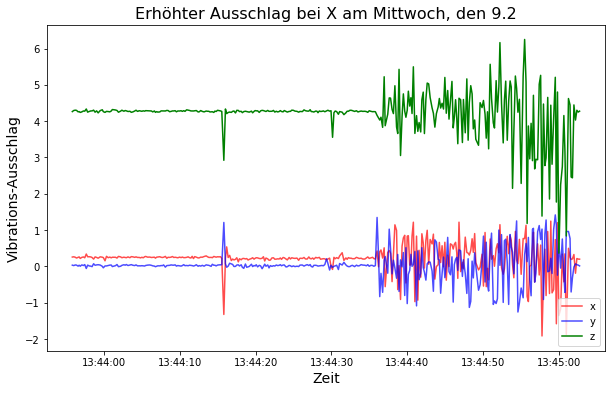

In [105]:
for i in X:
    if (i < 300):
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i: i + 350], df.x[i: i + 350], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.y[i: i + 350], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.z[i: i + 350], color='green', label='z')

    else:    
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i - 100: i + 250], df.x[i - 100: i + 250], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.y[i - 100: i + 250], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.z[i - 100: i + 250], color='green', label='z')

    plt.legend(loc=4)
    ax.set_xlabel("Zeit", fontsize=14)
    ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
    ax.set_title("Erhöhter Ausschlag bei X am " + str(df.day_name[i]) + ", den " + str(df.time.dt.day[i]) + "." + str(df.time.dt.month[i]), fontsize=16)    

In [80]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [97]:
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[:] = scaler.fit_transform(df_norm)

In [104]:
dbscan = DBSCAN(eps=0.14, min_samples=5)
labels = dbscan.fit_predict(df_norm)
#df_pca['label_DBSCAN'] = labels

MemoryError: 

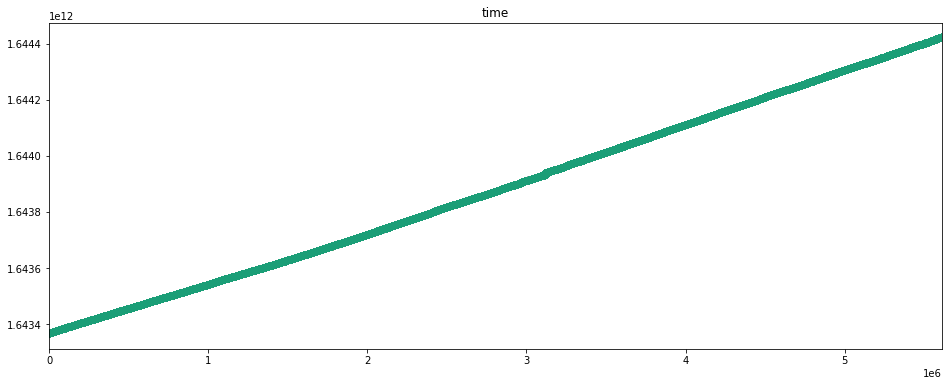

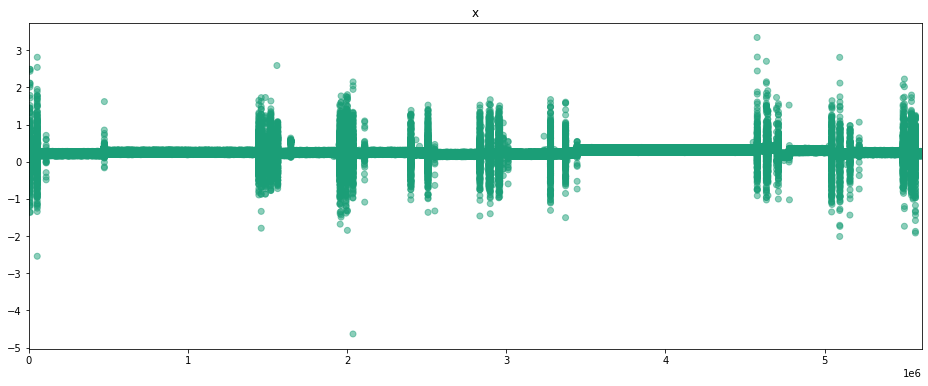

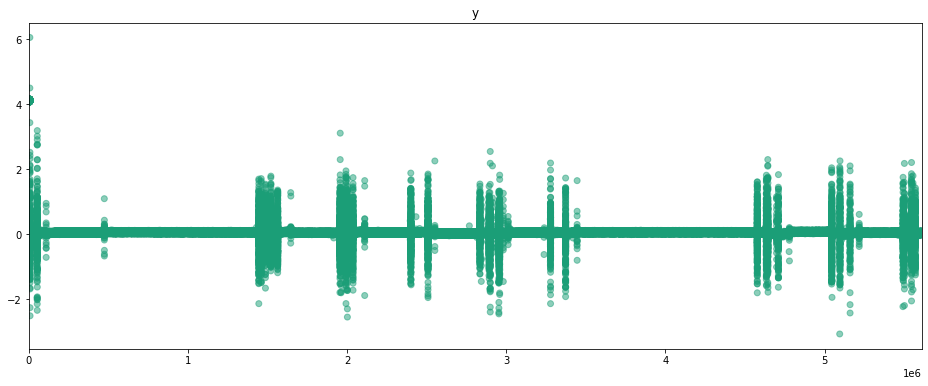

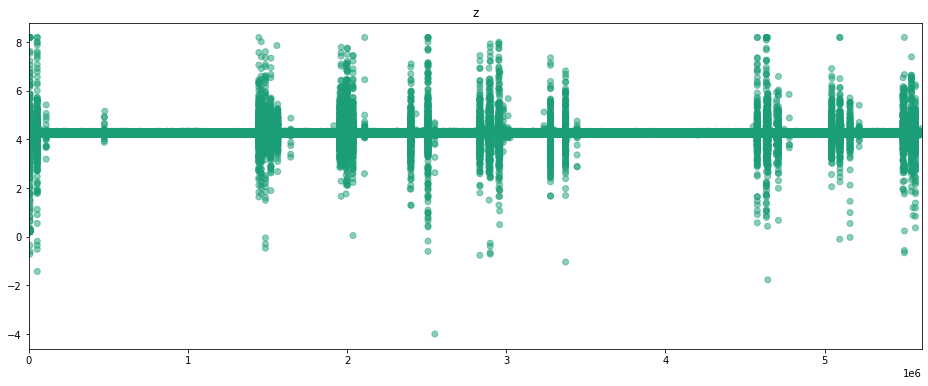

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.scatter(df.index, df['x'], c=labels, alpha=0.5, cmap=plt.get_cmap('Dark2'))
plt.xlim([df.index[0], df.index[-1]])
plt.title('X')